In [370]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy.stats import zscore
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import joblib
import warnings
warnings.filterwarnings("ignore")

In [371]:
df=pd.read_csv("Loan_Prediction.csv")

In [372]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [373]:
#loan id column can be dropped

In [374]:
df.drop("Loan_ID",axis=1,inplace=True)

In [375]:
df.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [376]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [377]:
df["Gender"].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [378]:
df["Gender"].unique()

array(['Male', 'Female', nan], dtype=object)

In [379]:
df["Gender"]=df["Gender"].fillna(df["Gender"].mode()[0])

In [380]:
df["Gender"].value_counts()


Male      502
Female    112
Name: Gender, dtype: int64

In [381]:
df["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [382]:
df["Married"].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [383]:
df["Married"].unique()

array(['No', 'Yes', nan], dtype=object)

In [384]:
df["Married"]=df["Married"].fillna(df["Married"].mode()[0])

In [385]:
df["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [386]:
df["Married"].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [387]:
df["Dependents"].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [388]:
df["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [389]:
df["Dependents"]=df["Dependents"].fillna(df["Dependents"].mode()[0])

In [390]:
df["Dependents"].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [391]:
df["Education"].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [392]:
df["Education"].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [393]:
# No null values in the education column

In [394]:
df["Self_Employed"].unique()

array(['No', 'Yes', nan], dtype=object)

In [395]:
df["Self_Employed"].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [396]:
df["Self_Employed"]=df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])

In [397]:
df["Self_Employed"].unique()

array(['No', 'Yes'], dtype=object)

In [398]:
df["Self_Employed"].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [399]:
df["Credit_History"].unique()

array([ 1.,  0., nan])

In [400]:
df["Credit_History"].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [401]:
df["Credit_History"]=df["Credit_History"].fillna(df["Credit_History"].mode()[0])

In [402]:
df["Credit_History"].unique()

array([1., 0.])

In [403]:
df["Credit_History"].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

In [404]:
import seaborn as sn

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

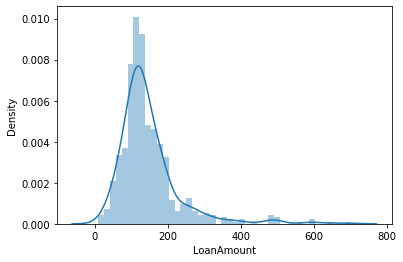

In [405]:
sn.distplot(df["LoanAmount"])

In [406]:
#in loanamount column we will use median to fill null values as it is right hand side skewed data

In [407]:
df["LoanAmount"].unique()

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

In [408]:
df["LoanAmount"].value_counts()

120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
         ..
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [409]:
df["LoanAmount"]=df["LoanAmount"].fillna(df["LoanAmount"].median())

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

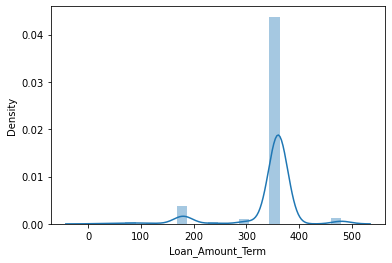

In [410]:
sn.distplot(df["Loan_Amount_Term"])

In [411]:
df["Loan_Amount_Term"].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [412]:
df["Loan_Amount_Term"].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [413]:
df["Loan_Amount_Term"]=df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].median())

In [414]:
df["Loan_Amount_Term"].unique()

array([360., 120., 240., 180.,  60., 300., 480.,  36.,  84.,  12.])

In [415]:
df["Loan_Amount_Term"].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [416]:
#in loanamount term column we will use median to fill null values as it is left side skewed data

In [417]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [418]:
#All the null values has been treated

In [419]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [420]:
from sklearn.preprocessing import LabelEncoder

In [421]:
LE = LabelEncoder()
df["Gender"]=LE.fit_transform(df["Gender"])

In [422]:
df["Married"]=LE.fit_transform(df["Married"])

In [423]:
df["Education"]=LE.fit_transform(df["Education"])

In [424]:
df["Self_Employed"]=LE.fit_transform(df["Self_Employed"])

In [425]:
df["Property_Area"]=LE.fit_transform(df["Property_Area"])
df["Loan_Status"]=LE.fit_transform(df["Loan_Status"])

In [426]:
df["Dependents"]=LE.fit_transform(df["Dependents"])

In [427]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [428]:
df.dtypes

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [429]:
#all the columns are in int and float type

In [430]:
df.shape

(614, 12)

In [431]:
#There are 614 columns and 13 rows

In [432]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,145.752443,342.410423,0.855049,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.107233,64.428629,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


In [433]:
#There are outliers present in some columns we will look into the same in nexts steps

In [434]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int32  
 11  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(7), int64(1)
memory usage: 40.9 KB


<AxesSubplot:>

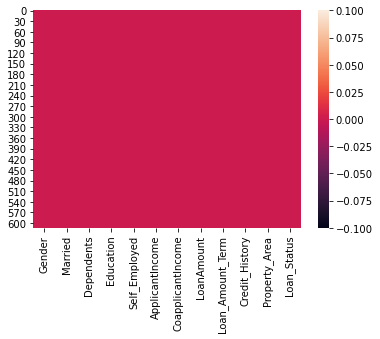

In [435]:
sns.heatmap(df.isnull())

In [436]:
#the clear graph of no null values present in the dataset

In [437]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

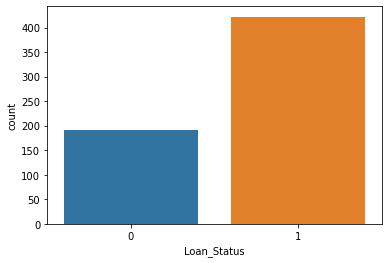

In [438]:
sns.countplot(df["Loan_Status"])

In [439]:
# not treating it as the class imblance roblem as there is no extreme gap

<AxesSubplot:>

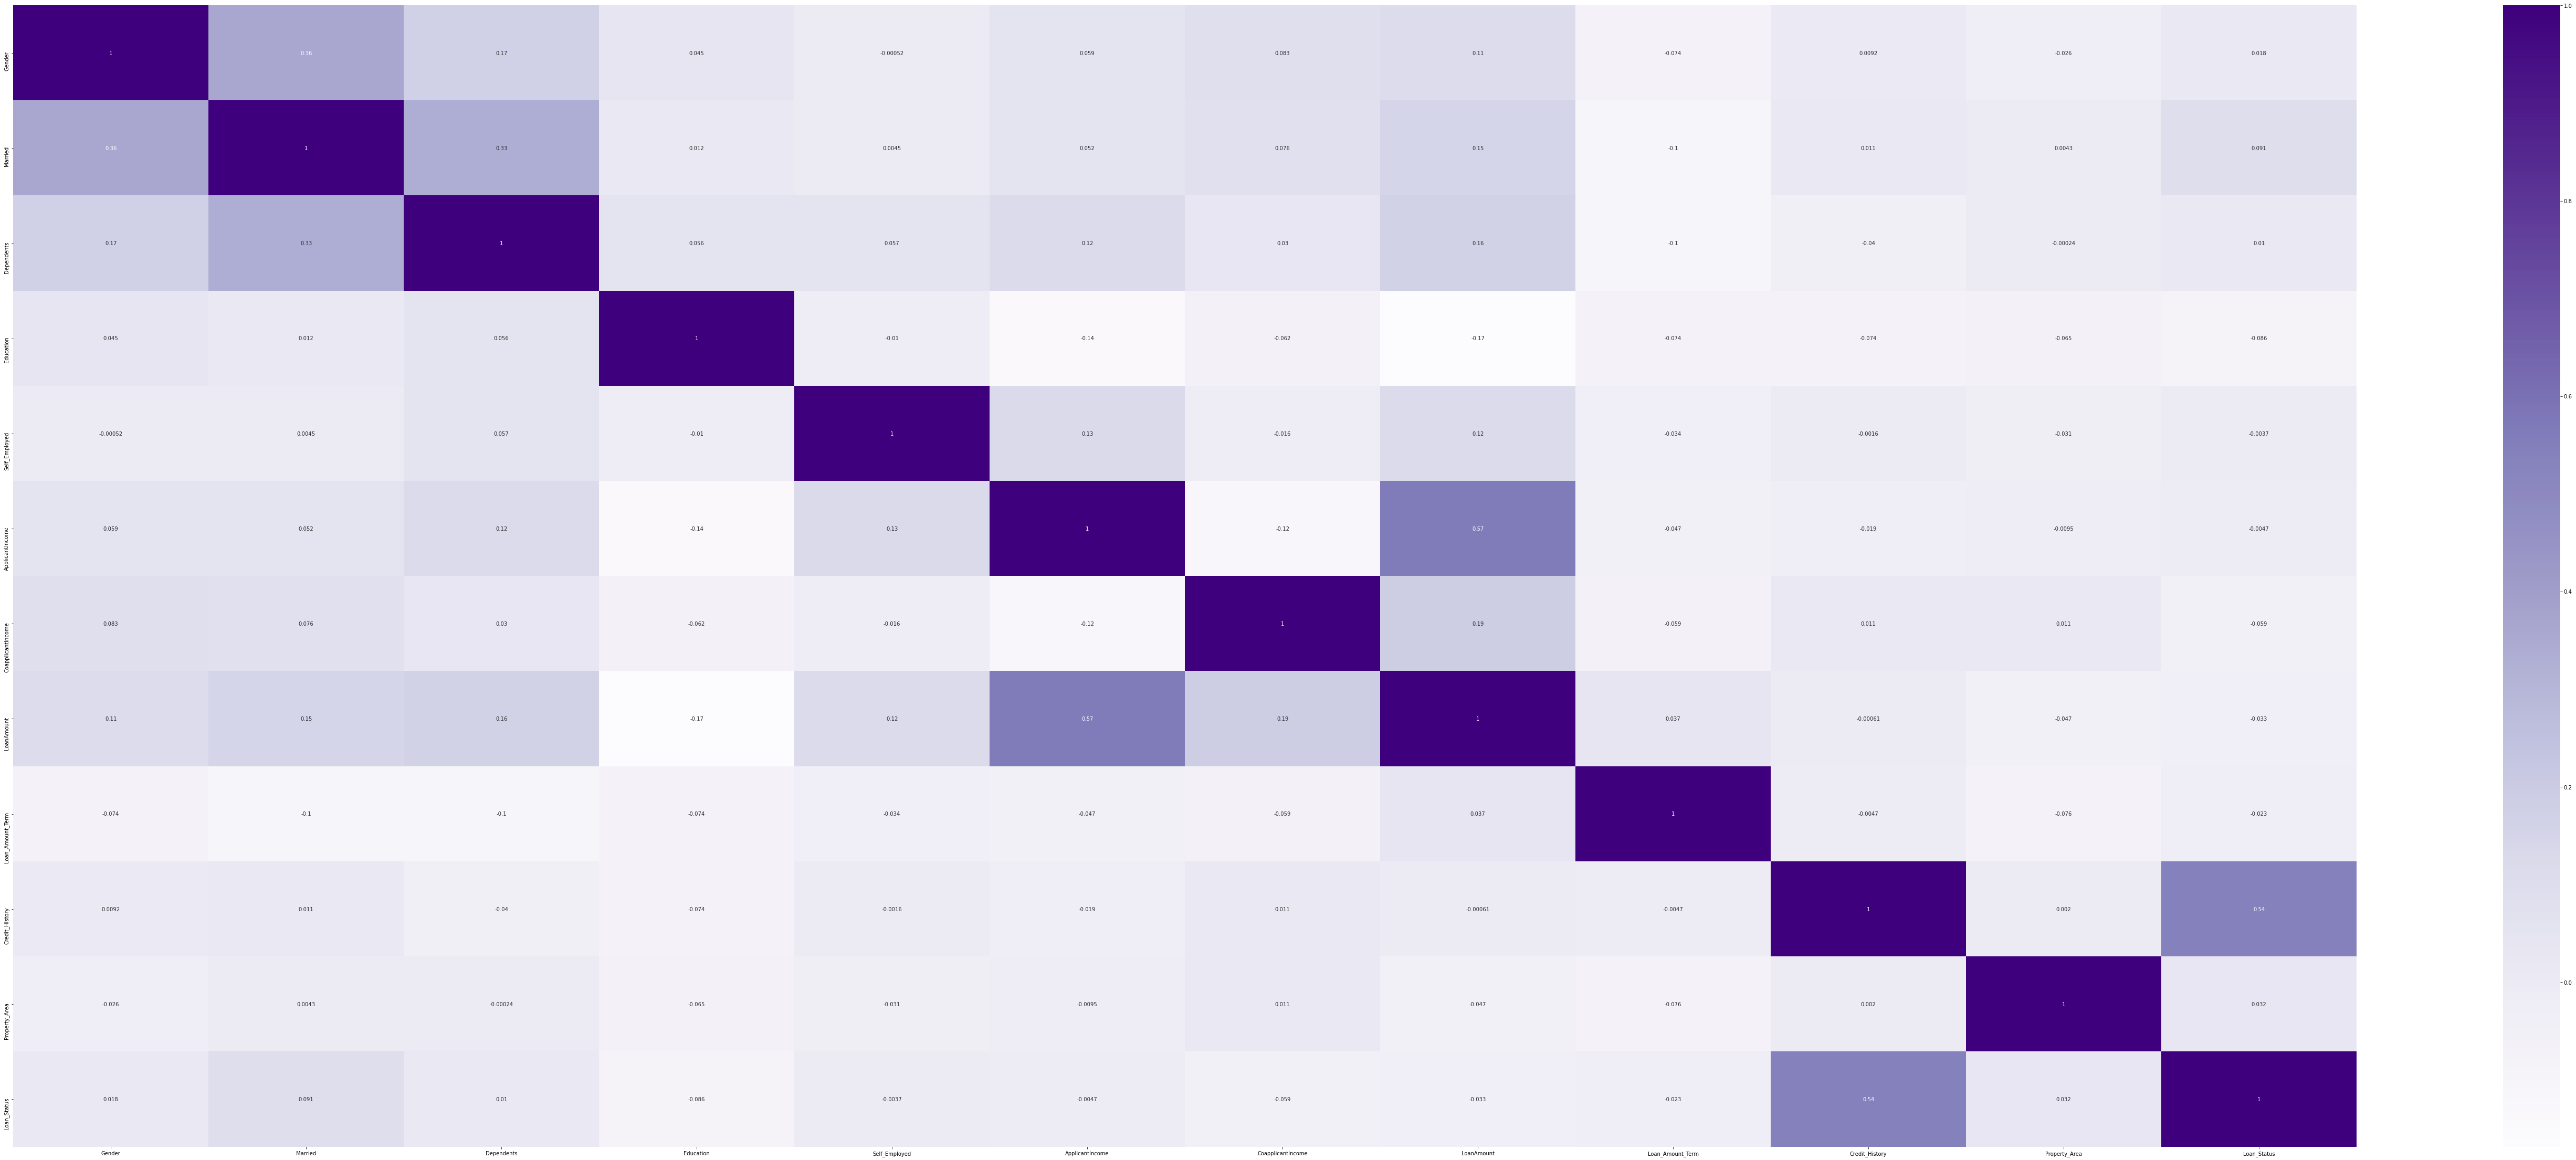

In [440]:
fig=plt.figure(figsize=(100,40))
hc=df.corr(method="pearson")
sns.heatmap(hc,annot=True,cmap="Purples")

In [441]:
df_corrr=df.corr()

In [442]:
df_corrr

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.106904,-0.074030,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.146546,-0.100912,0.010938,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163103,-0.103864,-0.040160,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.168759,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115100,-0.033739,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565181,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.189218,-0.059383,0.011134,0.010522,-0.059187
LoanAmount,0.106904,0.146546,0.163103,-0.168759,0.115100,0.565181,0.189218,1.000000,0.036960,-0.000607,-0.046632,-0.033214
Loan_Amount_Term,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.046531,-0.059383,0.036960,1.000000,-0.004705,-0.076120,-0.022549
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,-0.018615,0.011134,-0.000607,-0.004705,1.000000,0.001963,0.540556


<Figure size 432x288 with 0 Axes>

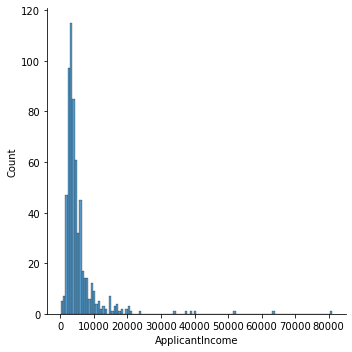

<Figure size 432x288 with 0 Axes>

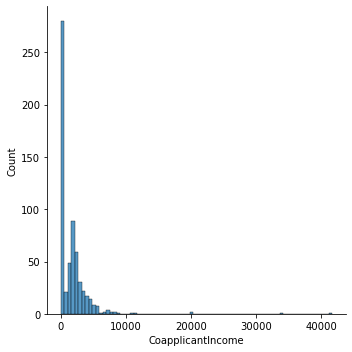

<Figure size 432x288 with 0 Axes>

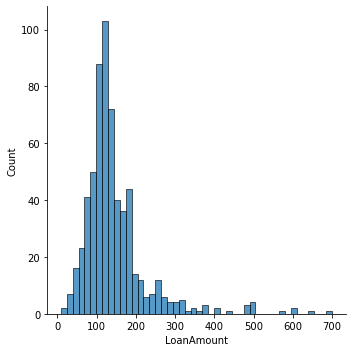

<Figure size 432x288 with 0 Axes>

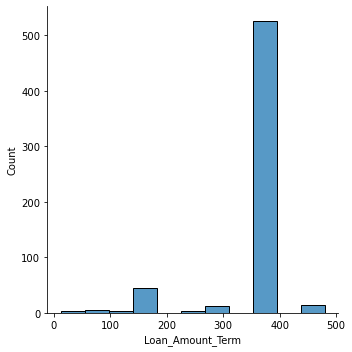

In [443]:
columns=["ApplicantIncome","CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"]

for i in df[columns]:
    plt.figure()
    sns.displot(df[i])

In [444]:
# distribution column for each and every column

In [445]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

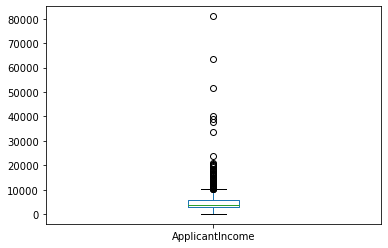

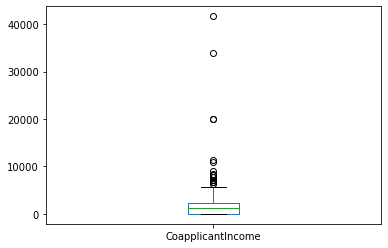

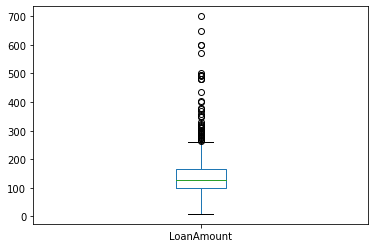

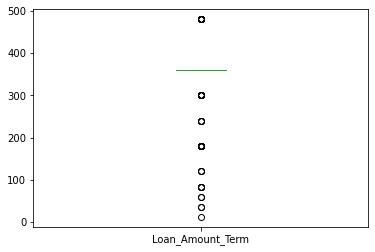

In [446]:
columns=["ApplicantIncome","CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"]

for i in df[columns]:
    plt.figure()
    df[i].plot.box()

In [447]:
#ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term these are the four columns where we have to remove skewness

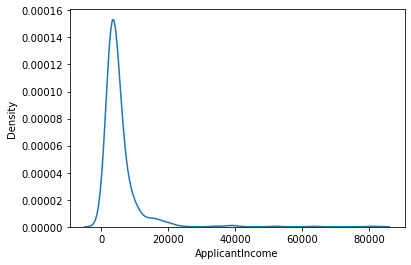

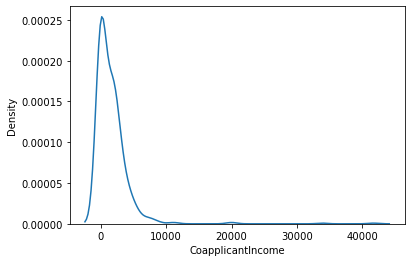

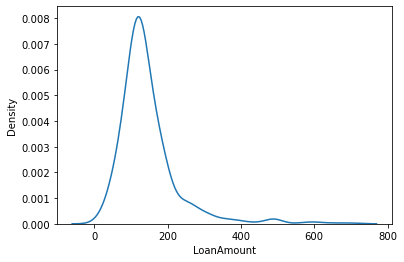

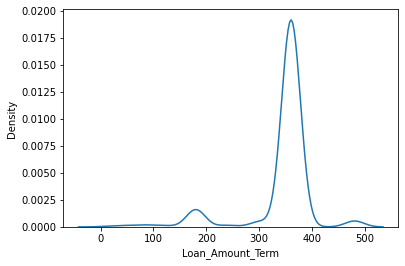

In [448]:
columns=["ApplicantIncome","CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"]

for i in df[columns]:
    plt.figure()
    sns.kdeplot(df[i])

In [449]:
#with kdeplot we can clearly see the distribution of data

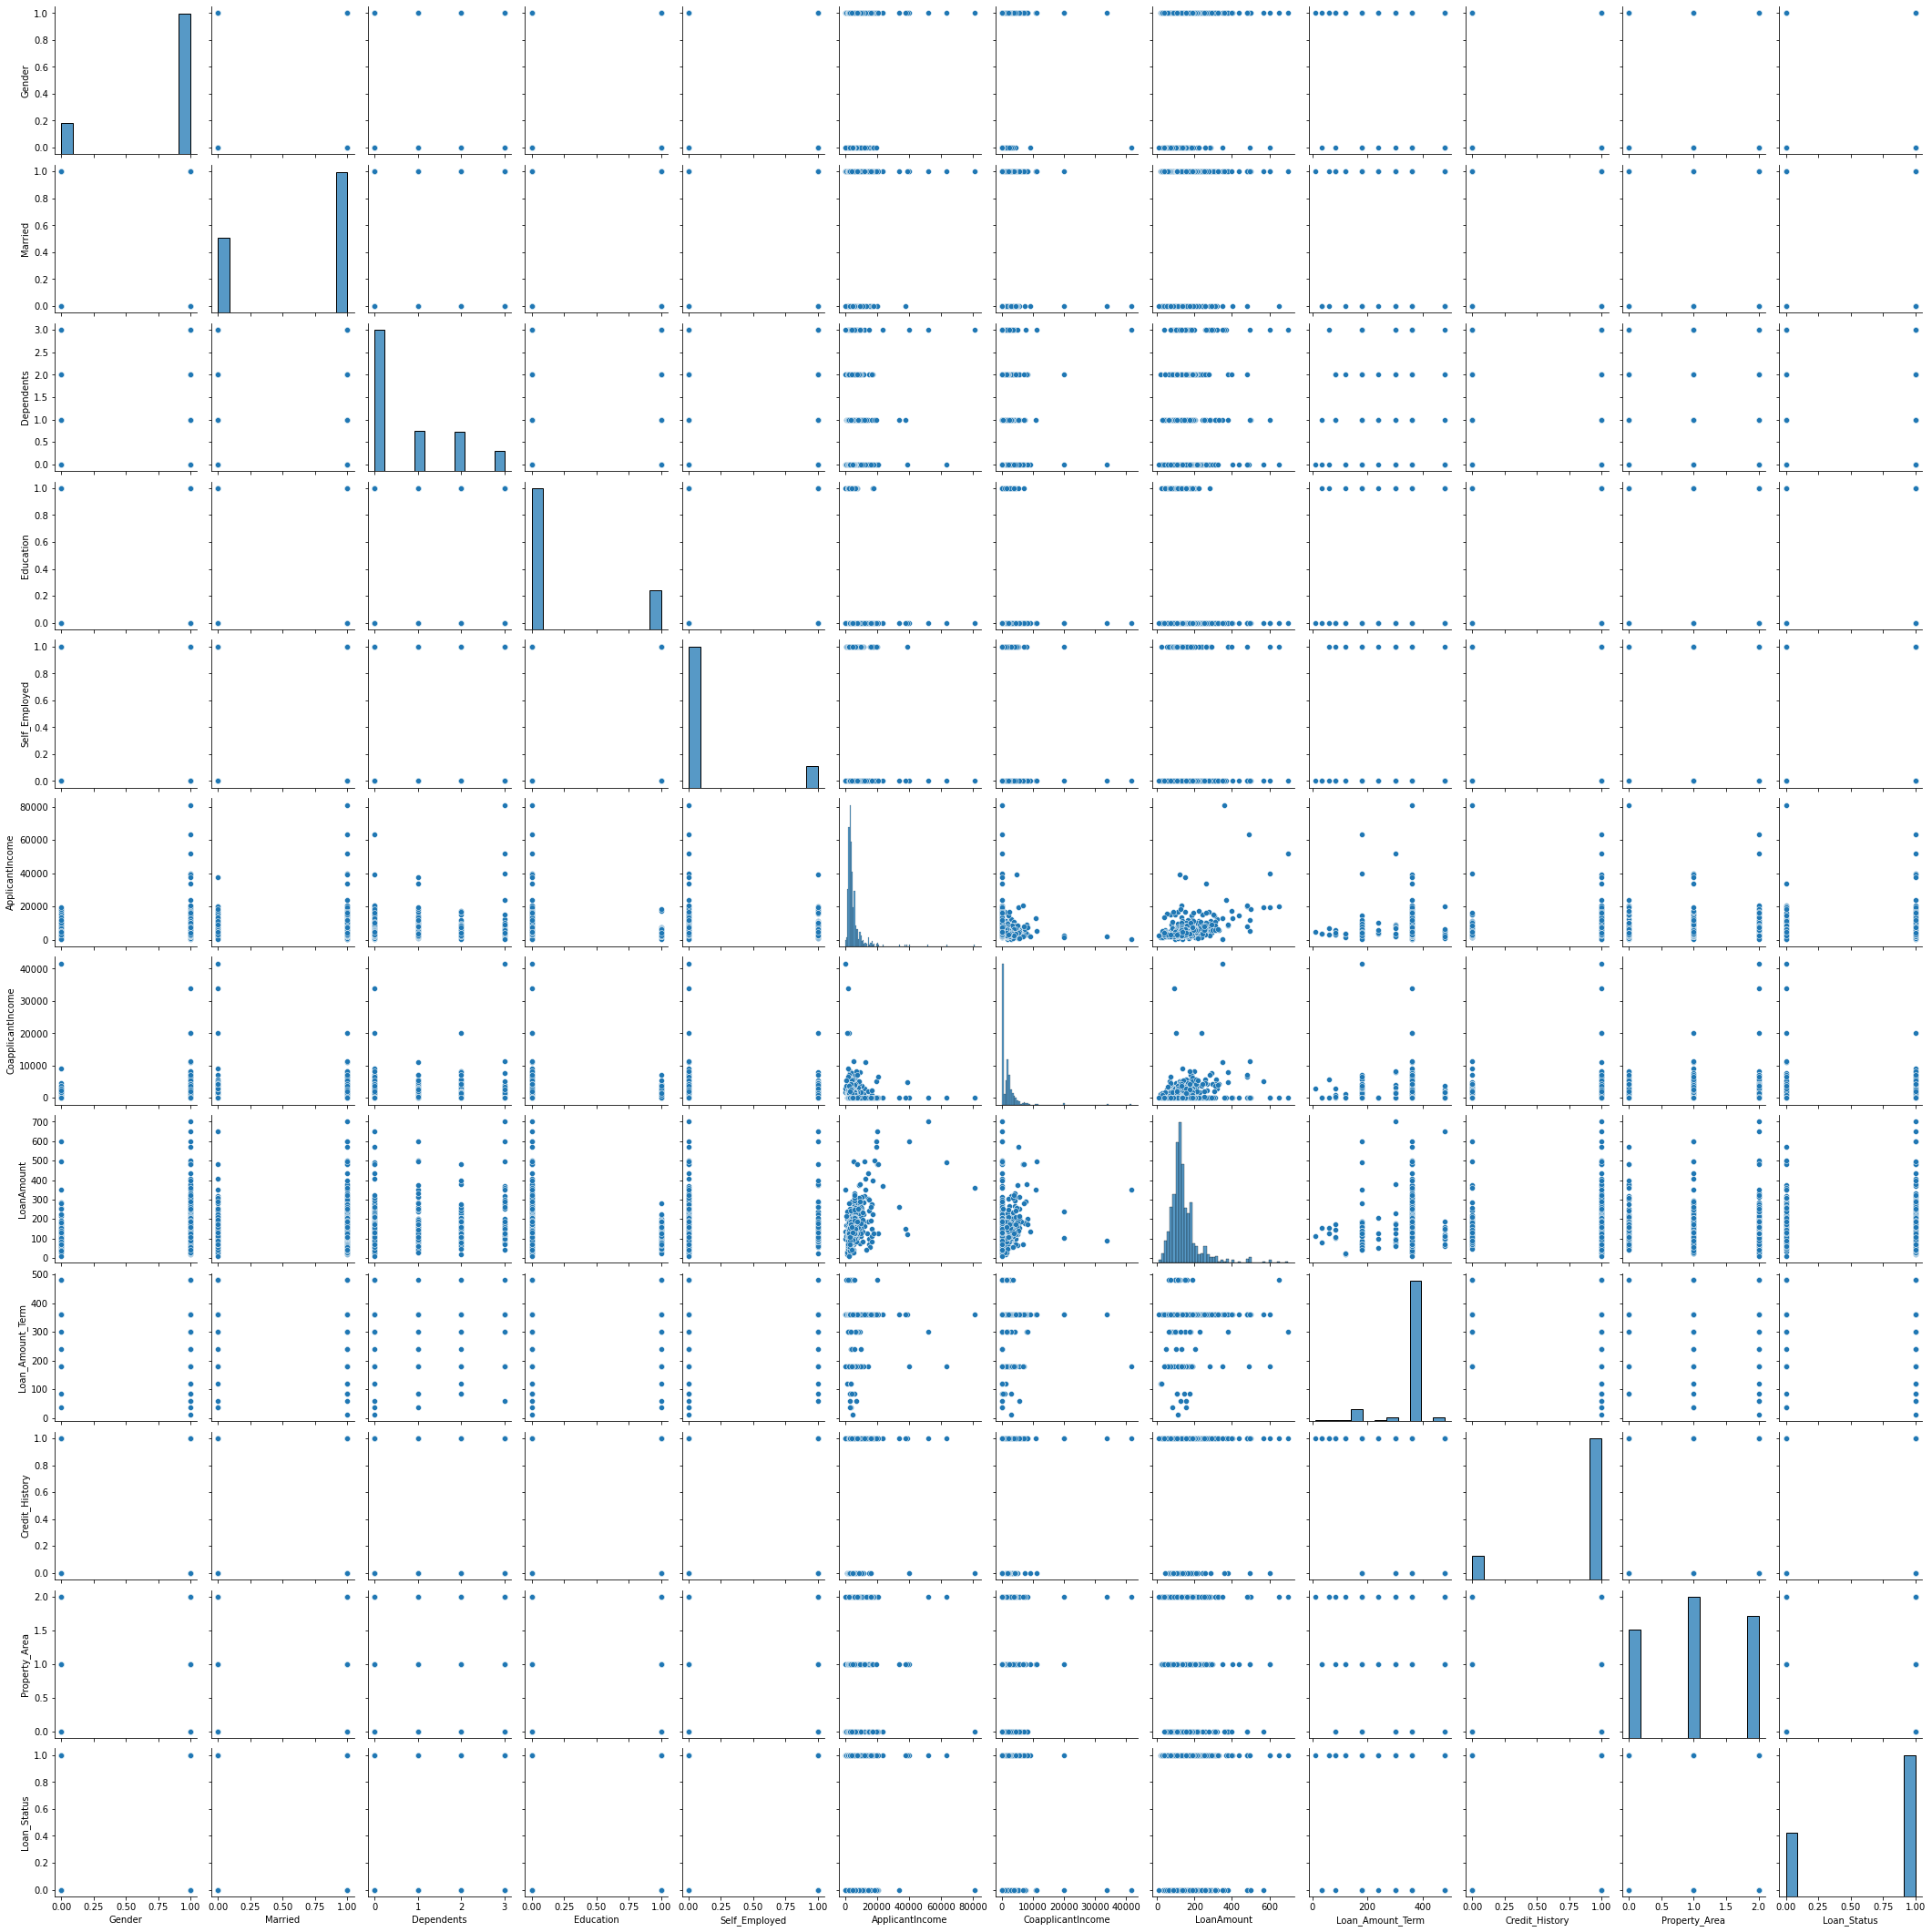

In [450]:
sns.pairplot(df)

In [451]:
#multivariate analysis 

In [452]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

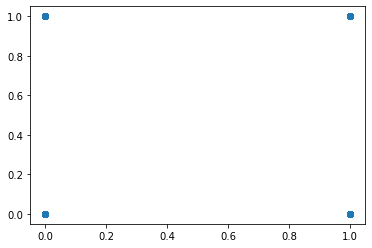

In [453]:
plt.scatter(df["Gender"],df["Loan_Status"])

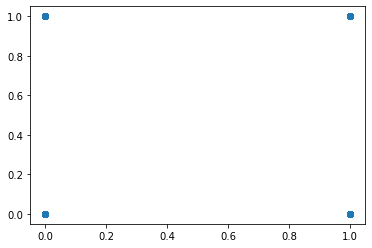

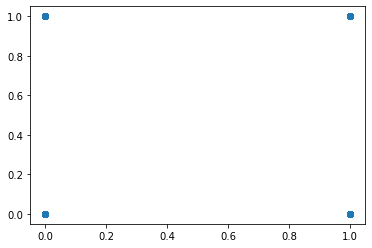

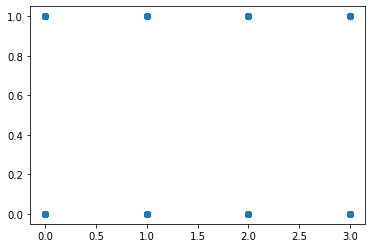

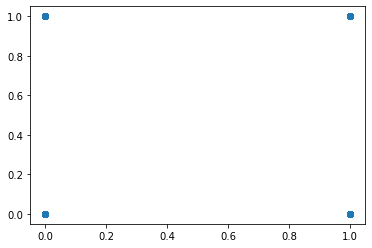

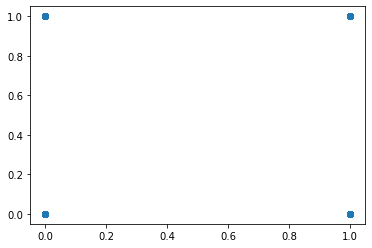

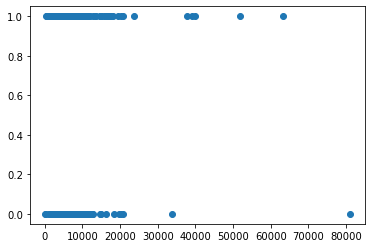

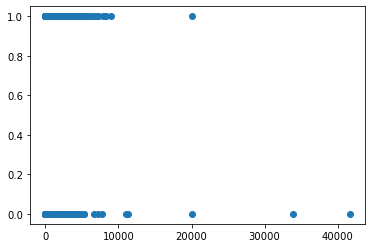

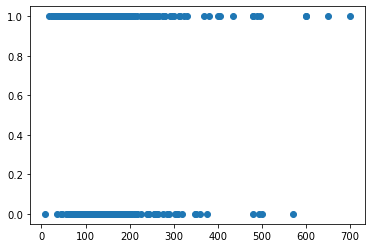

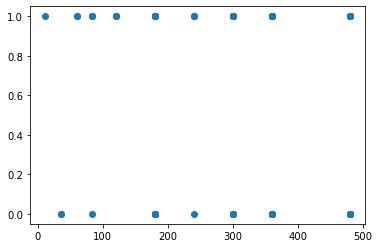

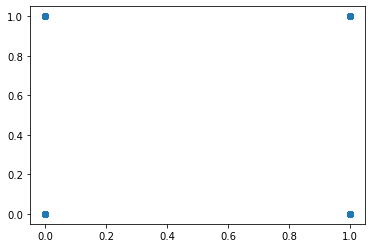

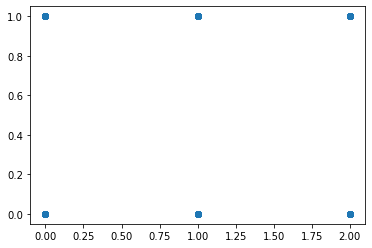

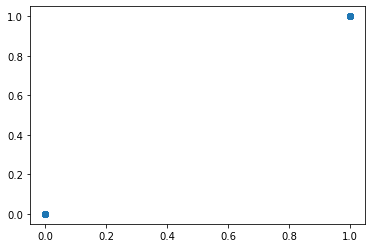

In [454]:
columns=df.columns

for i in df[columns]:
    plt.figure()
    plt.scatter(df[i],df["Loan_Status"])

In [455]:
#bivariate analysis

In [456]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.743053
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [457]:
#applying zscore on 4 numerical columns

In [458]:
from scipy.stats import zscore

In [459]:
df4=df[["ApplicantIncome","CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"]]
z=np.abs(zscore(df4))
df_new=df[(z<3).all(axis=1)]

In [460]:
print("shape before and after")
print("shape before".ljust(20),":",df.shape)
print("shape after".ljust(20),":",df_new.shape)
print("pecentage loss".ljust(20),":",(df.shape[0]-df_new.shape[0])/df.shape[0])

shape before and after
shape before         : (614, 12)
shape after          : (577, 12)
pecentage loss       : 0.06026058631921824


In [461]:
#there is .06% loss in data now we will try IQR method

In [462]:
q1=df4.quantile(0.25)
q3=df4.quantile(0.75)
IQR=q3-q1

In [463]:
df_new1=df[~((df4<(q1-1.5*IQR)) |(df4>(q3+1.5*IQR))).any(axis=1)]

In [464]:
print("shape before and after")
print("shape before".ljust(20),":",df.shape)
print("shape after".ljust(20),":",df_new1.shape)
print("pecentage loss".ljust(20),":",(df.shape[0]-df_new1.shape[0])/df.shape[0])

shape before and after
shape before         : (614, 12)
shape after          : (459, 12)
pecentage loss       : 0.252442996742671


In [465]:
#applied IQR and there is 25% data loss so we will go with zscore

In [466]:
df_new.shape

(577, 12)

In [467]:
df_new.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.151525
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

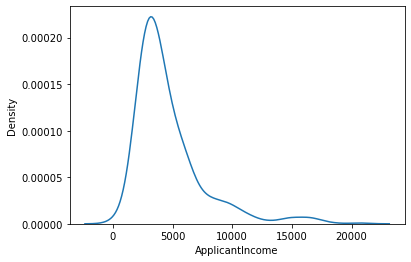

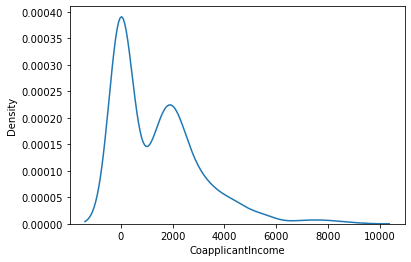

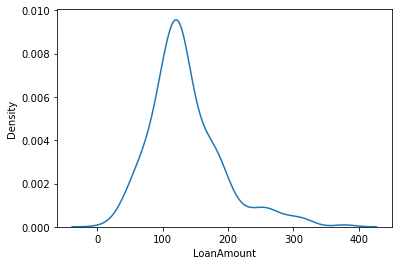

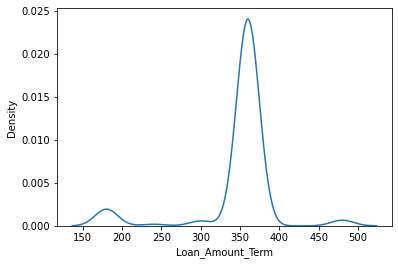

In [468]:
columns=["ApplicantIncome","CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"]

for i in df_new1[columns]:
    plt.figure()
    sns.kdeplot(df_new[i])

In [469]:
df_new.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [470]:
df_new.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [471]:
x=df_new.drop("Loan_Status",axis=1)
y=df_new["Loan_Status"]


In [472]:
#seprated the input and output data

In [473]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(x)

X=pd.DataFrame(x,columns=x.columns)
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2


In [474]:
#scalled the input data through the standard scaler

In [475]:
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("best accuracy is ",maxAccu," on Random sate ",maxRS)

best accuracy is  0.8793103448275862  on Random sate  39


In [476]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=39)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(403, 11)
(174, 11)
(403,)
(174,)


In [477]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print("accuracy score:",)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score:
0.8793103448275862
[[ 29  21]
 [  0 124]]
              precision    recall  f1-score   support

           0       1.00      0.58      0.73        50
           1       0.86      1.00      0.92       124

    accuracy                           0.88       174
   macro avg       0.93      0.79      0.83       174
weighted avg       0.90      0.88      0.87       174



In [478]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predg=gnb.predict(x_test)
print("accuracy score:",)
print(accuracy_score(y_test,predg))
print(confusion_matrix(y_test,predg))
print(classification_report(y_test,predg))

accuracy score:
0.8735632183908046
[[ 29  21]
 [  1 123]]
              precision    recall  f1-score   support

           0       0.97      0.58      0.72        50
           1       0.85      0.99      0.92       124

    accuracy                           0.87       174
   macro avg       0.91      0.79      0.82       174
weighted avg       0.89      0.87      0.86       174



In [479]:
sv=SVC()
sv.fit(x_train,y_train)
pred2=sv.predict(x_test)
print("accuracy score:",)
print(accuracy_score(y_test,pred2))
print(confusion_matrix(y_test,pred2))
print(classification_report(y_test,pred2))

accuracy score:
0.7126436781609196
[[  0  50]
 [  0 124]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.71      1.00      0.83       124

    accuracy                           0.71       174
   macro avg       0.36      0.50      0.42       174
weighted avg       0.51      0.71      0.59       174



In [480]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
pred3=rf.predict(x_test)
print("accuracy score:",)
print(accuracy_score(y_test,pred3))
print(confusion_matrix(y_test,pred3))
print(classification_report(y_test,pred3))

accuracy score:
0.8563218390804598
[[ 31  19]
 [  6 118]]
              precision    recall  f1-score   support

           0       0.84      0.62      0.71        50
           1       0.86      0.95      0.90       124

    accuracy                           0.86       174
   macro avg       0.85      0.79      0.81       174
weighted avg       0.85      0.86      0.85       174



In [481]:
ad=AdaBoostClassifier(n_estimators=100)
ad.fit(x_train,y_train)
pred4=ad.predict(x_test)
print("accuracy score:",)
print(accuracy_score(y_test,pred4))
print(confusion_matrix(y_test,pred4))
print(classification_report(y_test,pred4))

accuracy score:
0.8563218390804598
[[ 32  18]
 [  7 117]]
              precision    recall  f1-score   support

           0       0.82      0.64      0.72        50
           1       0.87      0.94      0.90       124

    accuracy                           0.86       174
   macro avg       0.84      0.79      0.81       174
weighted avg       0.85      0.86      0.85       174



In [482]:
#APPLYING CROSS VALIDATION
score=cross_val_score(LR,X,y,cv=5)
print(score)
print("/n")
print(score.mean())

[0.81034483 0.79310345 0.79130435 0.86086957 0.82608696]
/n
0.8163418290854573


In [483]:
score=cross_val_score(lg,X,y,cv=5)
print(score)
print("/n")
print(score.mean())

[0.81034483 0.79310345 0.79130435 0.86086957 0.82608696]
/n
0.8163418290854573


In [484]:
score=cross_val_score(gnb,X,y,cv=5)
print(score)
print(score.mean())

[0.81034483 0.79310345 0.79130435 0.82608696 0.80869565]
0.8059070464767617


In [485]:
score=cross_val_score(sv,X,y,cv=5)
print(score)
print(score.mean())

[0.68965517 0.68965517 0.69565217 0.68695652 0.68695652]
0.6897751124437781


In [486]:
score=cross_val_score(rf,X,y,cv=5)
print(score)
print(score.mean())

[0.80172414 0.77586207 0.79130435 0.82608696 0.79130435]
0.7972563718140929


In [487]:
score=cross_val_score(ad,X,y,cv=5)
print(score)
print(score.mean())

[0.74137931 0.75862069 0.76521739 0.83478261 0.83478261]
0.7869565217391304


In [488]:
#Logistic Regression IS THE BEST AS THERE IS LEAST DIFFERENCE BETWEEN THE CROSS VALIDATION AND MODEL ACCURACY

In [489]:
#conda install -c conda-forge scikit-plot

In [490]:
#conda update -n base -c defaults conda

In [491]:
print(confusion_matrix(y_test,pred))

[[ 29  21]
 [  0 124]]


In [492]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.58      0.73        50
           1       0.86      1.00      0.92       124

    accuracy                           0.88       174
   macro avg       0.93      0.79      0.83       174
weighted avg       0.90      0.88      0.87       174



In [493]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score

In [494]:
y_pred_prob=lg.predict_proba(x_test)[:,1]

In [495]:
y_pred_prob

array([0.86657834, 0.163689  , 0.69982878, 0.81531874, 0.66584229,
       0.55516044, 0.27871686, 0.83655563, 0.64604675, 0.71571794,
       0.186329  , 0.85694331, 0.22452367, 0.76550896, 0.71650482,
       0.75139439, 0.84378832, 0.64022763, 0.83325118, 0.86936158,
       0.83335463, 0.70816292, 0.83117235, 0.82234731, 0.90531664,
       0.66293136, 0.74277264, 0.67699563, 0.72403247, 0.69438209,
       0.79022238, 0.77357547, 0.19797991, 0.14891228, 0.67531085,
       0.85086111, 0.22716562, 0.77934946, 0.29489516, 0.73234786,
       0.81044594, 0.75589672, 0.72160243, 0.83984891, 0.74264905,
       0.61303217, 0.85808601, 0.25757869, 0.75945543, 0.75647637,
       0.83188179, 0.79719131, 0.77592078, 0.81703565, 0.14719868,
       0.50770073, 0.93381637, 0.85316791, 0.82462364, 0.65783273,
       0.73693915, 0.77272312, 0.8398163 , 0.82618204, 0.77011518,
       0.23058898, 0.79074422, 0.72724681, 0.8799118 , 0.9178561 ,
       0.8274406 , 0.57171162, 0.8462714 , 0.83350391, 0.19580

In [496]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [497]:
fpr

array([0.  , 0.  , 0.  , 0.02, 0.02, 0.06, 0.06, 0.08, 0.08, 0.1 , 0.1 ,
       0.12, 0.12, 0.18, 0.18, 0.2 , 0.2 , 0.22, 0.22, 0.24, 0.24, 0.26,
       0.26, 0.28, 0.28, 0.3 , 0.3 , 0.32, 0.32, 0.34, 0.34, 0.42, 0.42,
       1.  ])

In [498]:
tpr

array([0.        , 0.00806452, 0.07258065, 0.07258065, 0.12903226,
       0.12903226, 0.16129032, 0.16129032, 0.20967742, 0.20967742,
       0.28225806, 0.28225806, 0.30645161, 0.30645161, 0.48387097,
       0.48387097, 0.60483871, 0.60483871, 0.75      , 0.75      ,
       0.75806452, 0.75806452, 0.76612903, 0.76612903, 0.82258065,
       0.82258065, 0.83064516, 0.83064516, 0.87096774, 0.87096774,
       0.95967742, 0.95967742, 1.        , 1.        ])

In [499]:
thresholds

array([1.93381637, 0.93381637, 0.86133261, 0.8611344 , 0.85316791,
       0.85086111, 0.84508096, 0.84378832, 0.8344911 , 0.83350391,
       0.8274406 , 0.82618204, 0.82234731, 0.8191869 , 0.78514462,
       0.78478769, 0.75978844, 0.75945543, 0.73234786, 0.73220877,
       0.72724681, 0.72403247, 0.72160243, 0.72129038, 0.69438209,
       0.68385435, 0.68094396, 0.67699563, 0.6693382 , 0.66679899,
       0.64022763, 0.59633937, 0.50770073, 0.09554523])

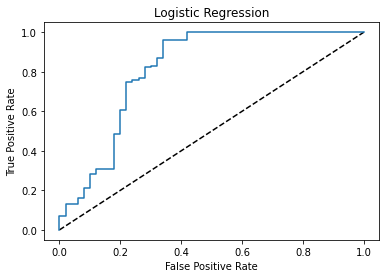

In [500]:
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression")
plt.show()

In [501]:
# auc roc curve

In [502]:
import joblib
joblib.dump(lg,"Loan_status.obj")
print("object of the dataset has been created")

object of the dataset has been created
